In [1]:
#%config InlineBackend.figure_formats = ['svg']
%config InlineBackend.figure_format = 'retina'
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from tqdm.auto import tqdm
from pandarallel import pandarallel

In [2]:
pandarallel.initialize(progress_bar=False, nb_workers=8)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [3]:
from rdkit import Chem 
from rdkit.Chem import Scaffolds
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol, MakeScaffoldGeneric

def generate_scaffolds(smiles :str) -> (str , str):
    murcko_smi = ""
    carbon_smi = ""
    if smiles:
        try:
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                murcko_mol = GetScaffoldForMol(mol)
                carbon_mol = MakeScaffoldGeneric(murcko_mol)
                murcko_smi = Chem.MolToSmiles(murcko_mol)
                carbon_smi = Chem.MolToSmiles(carbon_mol)
        except:
            pass
    return murcko_smi, carbon_smi

In [4]:
def read_npz(file):
    file = np.load(file)
    if "arr_0" in file:
        fp = file["arr_0"]
    else:
        fp = file["fps"]
    file.close()
    fp = np.unpackbits(fp, axis=1)
    return fp

In [5]:
experiment = "output"

In [6]:
#colors = "Set1"
colors = sns.color_palette(["gray", "royalblue", "limegreen", "fuchsia"])

In [7]:
all_data = pd.read_csv(f"{experiment}/promiscuous_processed.csv")
all_data["class_set"] = all_data[["class","set"]].apply(lambda x: ' '.join(x), axis=1)

In [8]:
all_data

,cids,NostereoAromaticSMILES,rdkit_smiles,class,set,inactive,active,encodable,NLL_0,NLL_1,...,NLL_192,NLL_193,NLL_194,NLL_195,NLL_196,NLL_197,NLL_198,NLL_199,NLL_200,class_set
0,1483729,C#CCN1c2ccccc2Sc3c1nccc3,C#CCN1c2ccccc2Sc2cccnc21,multitarget,training,174,6,True,21.387634,21.237390,...,16.529953,16.579832,16.597193,16.598688,16.543293,16.469414,16.514149,16.565979,16.504505,multitarget training
1,2803060,C#CCSc1c(c(sn1)SCC#C)C#N,C#CCSc1nsc(SCC#C)c1C#N,multitarget,training,244,6,True,25.435406,25.543407,...,16.977541,17.072138,17.067848,17.018055,16.830230,16.742233,16.677542,16.708557,16.730461,multitarget training
2,16195846,C#Cc1ccc(cc1)C2CC(OC(=C2)C(=O)N3CCN(CC3)Cc4ccc...,C#Cc1ccc(C2C=C(C(=O)N3CCN(Cc4ccccc4)CC3)OC(OCC...,multitarget,training,151,6,True,26.490920,26.334568,...,20.697884,20.671890,20.672901,20.686928,20.666473,20.573582,20.579933,20.707083,20.698412,multitarget training
3,15910,C(#N)c1c(c(c(c(c1Cl)Cl)Cl)C#N)Cl,N#Cc1c(Cl)c(Cl)c(Cl)c(C#N)c1Cl,multitarget,test,24,5,True,16.172943,16.166480,...,14.846571,15.024720,14.982287,14.865892,14.852013,14.901800,14.970851,15.054768,14.919376,multitarget test
4,219402,C(=O)C(C1C(C(C(=O)O1)O)O)O,O=CC(O)C1OC(=O)C(O)C1O,multitarget,test,100,6,True,28.578636,28.121542,...,26.758510,26.623638,26.574932,26.662964,26.547087,26.294607,26.226974,26.233580,26.405636,multitarget test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126660,2271648,COc1ccc(cc1OC)C(=O)NCCSCc2ccco2,COc1ccc(C(=O)NCCSCc2ccco2)cc1OC,notarget,test,271,0,True,21.621990,21.261372,...,20.394420,20.464436,20.385246,20.422644,20.343554,20.201818,20.377756,20.376064,20.427292,notarget test
126661,16015661,COc1ccccc1OCC(=O)NCC2(CCCCC2)N3CCOCC3,COc1ccccc1OCC(=O)NCC1(N2CCOCC2)CCCCC1,notarget,test,36,0,True,20.991210,20.982899,...,24.373564,24.396523,24.438263,24.556833,24.522337,24.390020,24.422657,24.407433,24.354984,notarget test
126662,6460680,Cc1c(c(=O)n2c(n1)nc([nH]2)NC(=O)c3ccccc3F)Cl,Cc1nc2nc(NC(=O)c3ccccc3F)[nH]n2c(=O)c1Cl,notarget,test,35,0,True,40.816193,38.581573,...,34.832237,34.861350,35.050010,35.229584,35.210610,34.906185,35.122765,35.377747,35.315840,notarget test
126663,51359661,CCOC(=O)C1CSCCS(=O)(=O)N1Cc2cccc(c2)F,CCOC(=O)C1CSCCS(=O)(=O)N1Cc1cccc(F)c1,notarget,test,30,0,True,25.938965,26.273390,...,31.086374,31.321445,31.371016,31.305890,31.340025,31.437233,31.563883,31.821478,31.634583,notarget test


In [9]:
scaffolds = all_data["rdkit_smiles"].parallel_map(generate_scaffolds)
bm = [i[0] for i in scaffolds]
carbon = [i[0] for i in scaffolds]
all_data["BM scaffold"] = bm
all_data["Carbon skeleton"] = carbon

In [10]:
def add_epoch_to_list(epoch, mylist):
    if epoch not in mylist:
        mylist.append(epoch)
    return mylist 
        
        
epochs = list(range(26))
steps = [100,50,25,10,5,2,1]
for r in steps:
    for i in range(0,201,r):
        epochs = add_epoch_to_list(i,epochs)


In [11]:
for epoch in tqdm(epochs):
    if os.path.exists(f"sampled/{epoch}/processed_with_nn_with_scaffold.feather"):
        continue
    else:
        data = pd.read_feather(f"sampled/{epoch}/processed_with_nn.feather")
        scaffolds = data["normalized_smiles"].parallel_map(generate_scaffolds)
        bm = [i[0] for i in scaffolds]
        carbon = [i[0] for i in scaffolds]
        data["BM scaffold"] = bm
        data["Carbon skeleton"] = carbon
        data.to_feather(f"sampled/{epoch}/processed_with_nn_with_scaffold.feather")

In [12]:
value_var = list(map(str,list(range(0,201))))
def renamer(x):
    if x.startswith("NLL"):
        x = x.split("_")[-1]
    return x
all_data_plot = all_data.copy().rename(columns=renamer)
all_data_plot = pd.melt(all_data_plot, id_vars='class_set', value_vars=value_var, var_name="Epoch", value_name='Negative Log Likelihood')
all_data_plot.Epoch = all_data_plot.Epoch.astype("int").astype('category')
all_data_plot.class_set = all_data_plot.class_set.astype('category')
#all_data_plot.class_set.cat.reorder_categories(['NonPromiscuous (test)', 'Promiscuous (training)', 'Promiscuous (test)'], inplace=True)
#all_data_plot.class_set.cat.rename_categories({'NonPromiscuous (test)':"NonPromiscuous"}, inplace=True)
all_data_plot["Negative Log Likelihood (Base 10)"]=-1*np.log10(np.exp(-1*all_data_plot["Negative Log Likelihood"]))
all_data_plot["Negative Log Likelihood (Base e)"] = all_data_plot["Negative Log Likelihood"]

In [254]:
classes = all_data["class_set"].unique()
distances = [0.1, 0.3, 0.4, 0.5]


matches = {}
matches_without_exact_matches = {}
matches_without_training_bm = {}
matches_without_training_skeleton = {}
for epoch in tqdm(range(201)):
    data = pd.read_feather(f"sampled/{epoch}/processed_with_nn_with_scaffold.feather").query("valid == 1").drop_duplicates("normalized_smiles")
    
    known_compounds = set(all_data["rdkit_smiles"])
    
    data_without_matches = data.query("normalized_smiles not in @known_compounds")
    
    known_training_BM = set(all_data.query("class_set == 'multitarget training'")["BM scaffold"])
    data_without_training_BM = data.query("`BM scaffold` not in @known_training_BM")

    known_training_skeleton = set(all_data.query("class_set == 'multitarget training'")["Carbon skeleton"])
    data_without_training_skeleton = data.query("`Carbon skeleton` not in @known_training_skeleton")

    
    for class_ in classes:
        for type_ in ["BM scaffold", "Carbon skeleton"]:
            name = f"{class_} {type_}"
            set_smiles = all_data.query("class_set == @class_")[type_].drop_duplicates()
            
            nb_matched = len(data.query(f"`{type_}` in @set_smiles").drop_duplicates(type_))
            percent_matched = (nb_matched / len(set_smiles)) * 100
            if name not in matches:
                matches[name] = []
            matches[name].append((nb_matched, percent_matched))


            nb_matched = len(data_without_matches.query(f"`{type_}` in @set_smiles").drop_duplicates(type_))
            percent_matched = (nb_matched / len(set_smiles)) * 100
            if name not in matches_without_exact_matches:
                matches_without_exact_matches[name] = []
            matches_without_exact_matches[name].append((nb_matched, percent_matched))

            set_smiles = all_data.query("class_set == @class_ and `BM scaffold` not in @known_training_BM")[type_].drop_duplicates()
            nb_matched = len(data_without_training_BM.query(f"`{type_}` in @set_smiles").drop_duplicates(type_))
            if len(set_smiles) == 0:
                percent_matched = 0
            else:
                percent_matched = (nb_matched / len(set_smiles)) * 100
            if name not in matches_without_training_bm:
                matches_without_training_bm[name] = []
            matches_without_training_bm[name].append((nb_matched, percent_matched))

            set_smiles = all_data.query("class_set == @class_ and `Carbon skeleton` not in @known_training_BM")[type_].drop_duplicates()
            nb_matched = len(data_without_training_skeleton.query(f"`{type_}` in @set_smiles").drop_duplicates(type_))
            if len(set_smiles) == 0:
                percent_matched = 0
            else:
                percent_matched = (nb_matched / len(set_smiles)) * 100
            if name not in matches_without_training_skeleton:
                matches_without_training_skeleton[name] = []
            matches_without_training_skeleton[name].append((nb_matched, percent_matched))


In [258]:
len(known_training_skeleton)

869

In [262]:
for class_ in classes:
    smiles = all_data.query("class_set == @class_")["BM scaffold"].drop_duplicates()
    set_smiles = all_data.query("class_set == @class_ and `BM scaffold` not in @known_training_BM")["BM scaffold"].drop_duplicates()
    print(class_, len(smiles), len(set_smiles))

multitarget training 869 0
multitarget test 1463 1252
singletarget test 33977 33642
notarget test 34024 33779


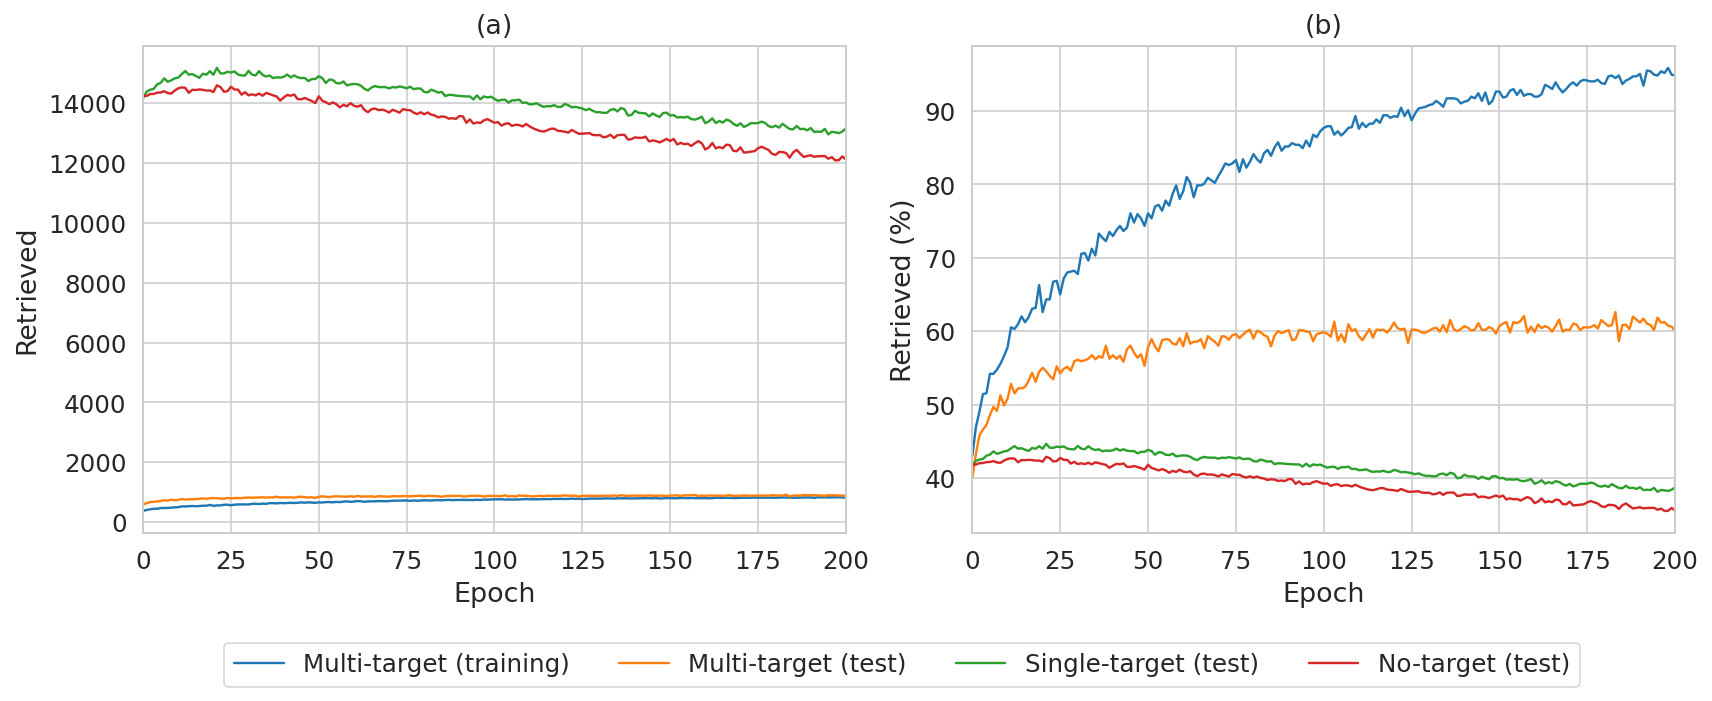

In [278]:
with sns.plotting_context("paper", font_scale=1.4):
    with sns.axes_style("whitegrid"):
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4.5)) 
        
        
        axes[0].plot(np.array(matches["multitarget training BM scaffold"])[:,0])
        axes[0].plot(np.array(matches["multitarget test BM scaffold"])[:,0])
        axes[0].plot(np.array(matches["singletarget test BM scaffold"])[:,0])
        axes[0].plot(np.array(matches["notarget test BM scaffold"])[:,0])
        axes[0].set_xlim(0,200)
        #axes[0].set_ylim(0,3000)
        axes[0].set_xlabel("Epoch")
        axes[0].set_ylabel("Retrieved")
        axes[0].set_title("(a)")
        
        
        
        
        axes[1].plot(np.array(matches["multitarget training BM scaffold"])[:,1])
        axes[1].plot(np.array(matches["multitarget test BM scaffold"])[:,1])
        axes[1].plot(np.array(matches["singletarget test BM scaffold"])[:,1])
        axes[1].plot(np.array(matches["notarget test BM scaffold"])[:,1])
        axes[1].set_xlim(0,200)
        #axes[1].set_ylim(20,100)
        axes[1].set_xlabel("Epoch")
        axes[1].set_ylabel("Retrieved (%)")
        axes[1].set_title("(b)")
        
        
        plt.tight_layout()
        lgd = plt.legend(["Multi-target (training)","Multi-target (test)","Single-target (test)","No-target (test)" ],loc='upper center', bbox_to_anchor=(-0.1,-0.2), ncol=4)
        
        if not os.path.exists("scaffolds_retrieved.svg"):
            fig.savefig("scaffolds_retrieved.svg", bbox_extra_artists=(lgd,), bbox_inches='tight')
        if not os.path.exists("scaffolds_retrieved.png"):
            fig.savefig("scaffolds_retrieved.png", dpi=400, bbox_extra_artists=(lgd,), bbox_inches='tight')